In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import warnings;warnings.simplefilter('ignore')
os.listdir('./data')

['PA_201605-2012001更新R7(20200323).xlsx', 'tag盤點表20200323.xlsx']

In [2]:
df = pd.read_excel('./data/PA_201605-2012001更新R7(20200323).xlsx',
                   index_col=0,
                   parse_dates=True)
df.head()

,MLPAP_TI-0706B02,MLPAP_TI-0706B03,MLPAP_TI-0706B04,MLPAP_TI-0706B05,MLPAP_TI-0706B06,MLPAP_TI-0706B07,MLPAP_TI-0706B08,MLPAP_TI-0706B09,MLPAP_TI-0706B10,MLPAP_TI-0706B11,...,MLPAP_FR-0755.PV,MLPAP_FR-0755PV(轉換後),MLPAP_FR-0791.PV,MLPAP_FI-V211.PV,MLPAP_FI-V211.PV(轉換後),MLPAP_PI-0658.PV,MLPAP_TIC-0757.PV,MLPAP_V125-PHD,MLPAP_PI-0771.PV,MLPAP_TRC-07471.PV
2016-05-09 00:00:00,400,401.957,400.752,402.251,401.149,401,400.05,403,402,401,...,4.05114,4.045683,6.48477,[-11059] No Good Data For Calculation,NaN,-1,1.63519,0.051,-1.38272,133.1
2016-05-09 00:10:00,400,401.943,400.95,402.249,401,401,400.25,403,402,401,...,4.15786,4.152250,6.44989,[-11059] No Good Data For Calculation,NaN,-1,1.62501,0.051,-1.38273,133.1
2016-05-09 00:20:00,400,401.9,400.9,402.101,401,401,400.1,403,402,401,...,4.20812,4.202449,6.4405,[-11059] No Good Data For Calculation,NaN,-0.898558,1.64978,0.051,-1.4,133.1
2016-05-09 00:30:00,400,401.95,400.9,402.3,401,401,400.145,403,402,401,...,4.15232,4.146723,6.46365,[-11059] No Good Data For Calculation,NaN,-0.50901,1.63519,0.051,-1.4,133.2
2016-05-09 00:40:00,400,402,400.85,402.176,401,401,400.405,403,402,401,...,4.01671,4.011298,6.4148,[-11059] No Good Data For Calculation,NaN,-0.992771,1.65426,0.051,-1.3,133.1


In [3]:
tag = pd.read_excel('./data/tag盤點表20200323.xlsx')
print(tag.shape)
tag.head()

(94, 10)


,item,TAG,chinese,character,unit,category,period,min,max,推測顯著性(依製程經驗)
0,1.0,MLPAP_TJC-0627.PV,OX預熱器出口溫度,溫度,℃,可控制因子,1分鐘2筆,140,160,***
1,2.0,MLPAP_TRC-0610.PV,空氣預熱器出口溫度,溫度,℃,可控制因子,1分鐘2筆,160,200,***
2,3.0,MLPAP_FR-0632.PV,汽機風量,流量,KNM3/HR,可控制因子,1分鐘2筆,30,90,****
3,4.0,MLPAP_FQ-0619.PV,OX入料量,流量,kg/HR,可控制因子,1分鐘2筆,2000,8000,****
4,5.0,MLPAP_TIC-0757A.PV,反應槽鹽浴溫度,溫度,℃,可控制因子,1分鐘2筆,345,365,****


In [4]:
print('only in df:')
set(df.columns)-set(tag['TAG'])

only in df:


{'MLPAP_FI-V211.PV',
 'MLPAP_FR-0755.PV',
 'MLPAP_TI-0716A02',
 'MLPAP_TI-0716A03',
 'MLPAP_TI-0716A04',
 'MLPAP_TI-0716A05',
 'MLPAP_TI-0716A06',
 'MLPAP_TI-0716A07',
 'MLPAP_TI-0716A08',
 'MLPAP_TI-0716A09',
 'MLPAP_TI-0716A10',
 'MLPAP_TI-0716A11',
 'MLPAP_TI-0716A12',
 'MLPAP_TI-0716A13',
 'MLPAP_TI-0716A14',
 'MLPAP_TI-0716A15',
 'MLPAP_TI-0716A16',
 'MLPAP_TI-0716A17',
 'MLPAP_TI-0716A18',
 'MLPAP_TI-0716A19',
 'MLPAP_TI-0716A20',
 'MLPAP_TI-0716A21',
 'MLPAP_TI-0716A22',
 'MLPAP_TI-0716A23',
 'MLPAP_TI-0757B.PV',
 'MLPAP_TRC-07471.PV'}

In [5]:
print('only in tag:')
set(tag['TAG'])-set(df.columns)

only in tag:


{'MLPAP_TJ-0716A02',
 'MLPAP_TJ-0716A03',
 'MLPAP_TJ-0716A04',
 'MLPAP_TJ-0716A05',
 'MLPAP_TJ-0716A06',
 'MLPAP_TJ-0716A07',
 'MLPAP_TJ-0716A08',
 'MLPAP_TJ-0716A09',
 'MLPAP_TJ-0716A10',
 'MLPAP_TJ-0716A11',
 'MLPAP_TJ-0716A12',
 'MLPAP_TJ-0716A13',
 'MLPAP_TJ-0716A14',
 'MLPAP_TJ-0716A15',
 'MLPAP_TJ-0716A16',
 'MLPAP_TJ-0716A17',
 'MLPAP_TJ-0716A18',
 'MLPAP_TJ-0716A19',
 'MLPAP_TJ-0716A20',
 'MLPAP_TJ-0716A21',
 'MLPAP_TJ-0716A22',
 'MLPAP_TJ-0716A23',
 'MLPAP_TRC-0747.PV',
 nan,
 '第二模型使用'}

# replace('TI','TJ')

In [6]:
df.columns = [str(i).replace('TI','TJ') for i in df.columns]
tag.TAG = [str(i).replace('TI','TJ') for i in tag.TAG]

In [7]:
print('only in tag:')
set(tag['TAG'])-set(df.columns)

only in tag:


{'MLPAP_TRC-0747.PV', 'nan', '第二模型使用'}

In [8]:
print('only in df:')
set(df.columns)-set(tag['TAG'])

only in df:


{'MLPAP_FI-V211.PV',
 'MLPAP_FR-0755.PV',
 'MLPAP_TJ-0757B.PV',
 'MLPAP_TRC-07471.PV'}

# drop two column

In [9]:
print(df.shape)
df = df.drop(['MLPAP_FR-0755.PV','MLPAP_FI-V211.PV'],axis=1)
print(df.shape)

(193825, 95)
(193825, 93)


# rename column

In [10]:
df = df.rename(columns={'MLPAP_TRC-07471.PV':'MLPAP_TRC-0747.PV'})

# add 'MLPAP_TJ-0757B.PV'

In [11]:
temp = tag[tag['TAG'] == tag['TAG'][tag['TAG'].str.contains('0757A')].values[0]].copy()
temp['TAG'] = 'MLPAP_TJ-0757B.PV'
tag = tag.append(temp)

In [12]:
tag.tail()

,item,TAG,chinese,character,unit,category,period,min,max,推測顯著性(依製程經驗)
90,91.0,MLPAP_TRC-0747.PV,E220出口溫度,溫度,℃,可控制因子,1分鐘2筆,100,200,***
91,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92,NaN,第二模型使用,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93,92.0,MLPAP_V125-PHD,粗PA儲槽PHD,組成,%,不可控制因子,1天1筆,0,0.1,***
4,5.0,MLPAP_TJ-0757B.PV,反應槽鹽浴溫度,溫度,℃,可控制因子,1分鐘2筆,345,365,****


# check tag sheet and df.columns

In [13]:
print('only in df:')
set(df.columns)-set(tag['TAG'])

only in df:


set()

In [14]:
print('only in tag:')
set(tag['TAG'])-set(df.columns)

only in tag:


{'nan', '第二模型使用'}

In [15]:
df = df.iloc[:-1,:]
print(df.shape)

(193824, 93)


# 欄位轉換

In [16]:
def f(x):
    a,b = str(x).split('*')
    return float(a)*float(b)

df['DATA OF USE'] = [f(i) for i in df['DATA OF USE']]
df[['DATA OF USE']].sample(5)

,DATA OF USE
2018-02-04 19:20:00,0.436173
2017-11-16 19:10:00,0.381374
2019-07-12 17:00:00,0.794326
2017-05-18 11:10:00,0.256488
2019-10-04 11:30:00,0.851703


In [17]:
df = df.replace('[-11059] No Good Data For Calculation',np.nan)

In [18]:
df = df.replace('Scan Off',np.nan)

In [19]:
df = df.replace('Not Connect',np.nan)

In [20]:
df = df.replace('I/O Timeout',np.nan)

In [21]:
df = df.replace('Bad',np.nan)

In [22]:
df = df.astype('float32')
df.dtypes

MLPAP_TJ-0706B02     float32
MLPAP_TJ-0706B03     float32
MLPAP_TJ-0706B04     float32
MLPAP_TJ-0706B05     float32
MLPAP_TJ-0706B06     float32
                      ...   
MLPAP_PI-0658.PV     float32
MLPAP_TJC-0757.PV    float32
MLPAP_V125-PHD       float32
MLPAP_PI-0771.PV     float32
MLPAP_TRC-0747.PV    float32
Length: 93, dtype: object

# check

In [23]:
def get_col(name):
    return df.columns[df.columns.str.contains(name)].tolist()

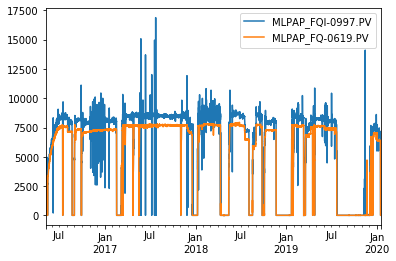

In [24]:
col1 = get_col('0997')
col2 = get_col('0619')
df[col1+col2].plot()

In [25]:
df.to_csv('./data/train_cleaned.csv')
print('done')

done
